In [1]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [4]:
import seaborn as sns

In [6]:
df_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

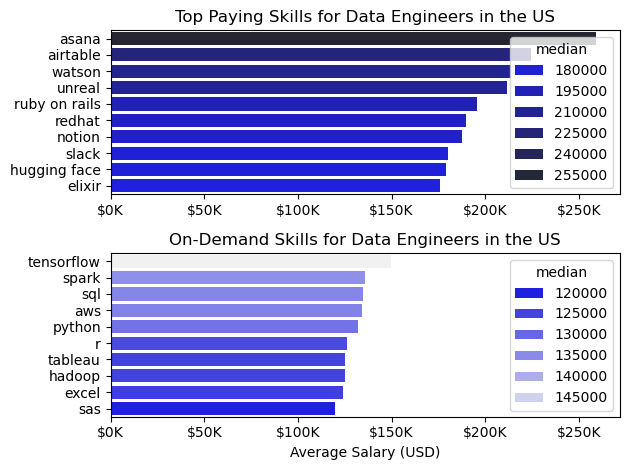

In [15]:
df_US = df_US.explode('job_skills')
df_US_group = df_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
Top_paying_skills = df_US_group.sort_values(by='median', ascending=False).head(10)
On_demand_skills = df_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)


fig, ax = plt.subplots(2, 1)
# Top_paying_skills[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue', legend=False)

sns.barplot(data= Top_paying_skills, x= 'median' , y= Top_paying_skills.index, ax=ax[0], hue= 'median', palette='dark:b_r')


ax[0].set_title('Top Paying Skills for Data Engineers in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


# On_demand_skills[::-1].plot(kind='barh', y='median', ax=ax[1], color='skyblue', legend=False)
sns.barplot(data= On_demand_skills, x= 'median' , y= On_demand_skills.index, ax=ax[1], hue= 'median', palette='light:b_r')

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('On-Demand Skills for Data Engineers in the US')
ax[1].set_xlabel('Average Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()